In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
#Unzip the dataset
!unzip '/content/drive/MyDrive/dicoding/rockpaperscissors.zip'

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [ ]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os                                                                       
Data_scissors = os.path.join('/content/rockpaperscissors/scissors')  
Data_rock= os.path.join('/content/rockpaperscissors/rock')
Data_paper = os.path.join('/content/rockpaperscissors/paper') 

In [ ]:
print('total scissors images:', len(os.listdir(Data_scissors)))
print('total rock images:', len(os.listdir(Data_rock)))
print('total paper images:', len(os.listdir(Data_paper)))

rock_files = os.listdir(Data_rock)
print(rock_files[:10])

paper_files = os.listdir(Data_paper)
print(paper_files[:10])

scissors_files = os.listdir(Data_scissors)
print(scissors_files[:10])

total scissors images: 750
total rock images: 726
total paper images: 712
['lN7rUXL8DBzW1KoR.png', 'iupz1I8ISgp6PDj7.png', 'NlFsco3hpee3X0wS.png', 'wI8gSJIe2tzwPSub.png', 'rzRKFMMFob6PQPxk.png', 'XqR9QAFi9qQMUdw2.png', '8EjcPHxZBpTtX8bM.png', 'fMQzh7RRM5fbtBiC.png', '5qDxuZZrlJjTW8ld.png', 'rit0UhP5HizIFoJA.png']
['7PSJU8kbZf8S6FRW.png', 'RW8BP64V5NC04QWf.png', 'aICabYNb79bdS6Mu.png', '5eRezaxzYX8Canq0.png', 'TmPdVzKg9yHUefja.png', '0zKU6wEhT2cDe9j0.png', '7v943QrV87m1Fx5U.png', 'v1b7FBFD4ZbLJnhB.png', 'ZveWRNmdKejc1c4w.png', 'CIN4oPYURMvc4xTb.png']
['44Hu6owS3pPqmyG1.png', 'mdSPppG9v9OmnIyY.png', 'Em50Yggfyz815VUH.png', 'RpIg0o9X94lDnNcX.png', 'n8R1AoBrBUeqH7wZ.png', 'ismjaxPJzOizyqOx.png', 'TJUiCdN9LUl2xPSE.png', 'itSX8Pe5BwSSbcEb.png', 'hzvSpM4olIqXfeVt.png', 'SMQFKEq55U7752xf.png']


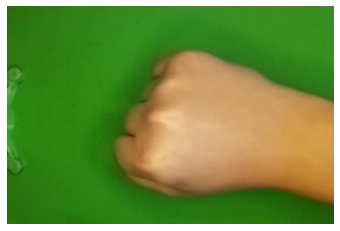

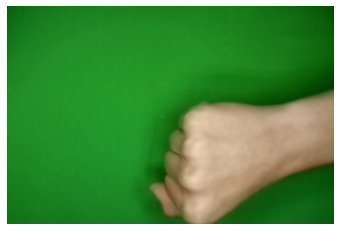

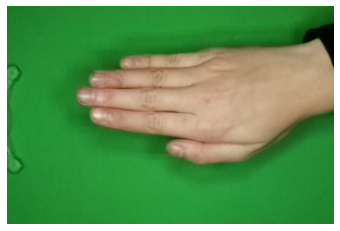

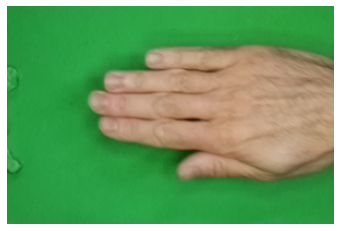

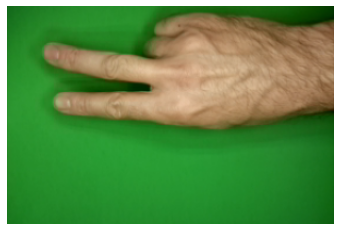

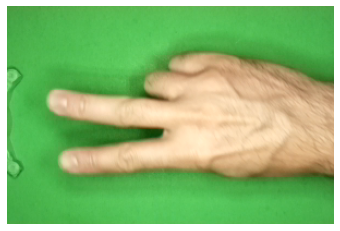

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(Data_rock, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(Data_paper, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(Data_scissors, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,MaxPooling2D,Conv2D,GlobalAveragePooling2D

In [ ]:
import shutil

shutil.rmtree('/content/rockpaperscissors/rps-cv-images')

In [ ]:
#Data Augmentation
dir_image = '/content/rockpaperscissors'
image_size_target = (224,224)
dim = (3,)
image_shape = image_size_target + dim

image_aug = ImageDataGenerator(
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=0.5,
    width_shift_range=0.5,
    vertical_flip = True,
    shear_range=0.1,
    zoom_range=0.4,
    rotation_range=20,
    validation_split = 0.4,
    fill_mode="nearest"
  )  

#Image Train Generator
image_train = image_aug.flow_from_directory(
    dir_image,
    target_size = image_size_target,
    batch_size=32,
    class_mode = 'categorical',
    shuffle=True,
    subset='training'
)

#Image Validation and Test Generator
image_val = image_aug.flow_from_directory(
    dir_image,
    target_size= image_size_target,
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
#Model Transfer Learning From Keras Application
from keras.applications.mobilenet import MobileNet

base_model = MobileNet(weights='imagenet',include_top=False,input_shape=image_shape)
KerasModel = Sequential()
KerasModel.add(base_model)
KerasModel.add(GlobalAveragePooling2D())
KerasModel.add(Dropout(0.5))
KerasModel.add(Dense(3,activation='softmax'))
KerasModel.summary()

#Compiling The Model
KerasModel.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

17235968/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 3)                 3075      
                                                                 
Total params: 3,231,939
Trainable params: 3,210,051
Non-trainable params: 21,888
__________________________________________

In [ ]:
KerasModel.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = KerasModel.fit_generator(image_train,
                             epochs=25,
                             validation_data = image_val,
                            verbose = 1)

KerasModel.save('rps.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/25
42/42 [==============================] - 50s 813ms/step - loss: 0.6210 - accuracy: 0.8250 - val_loss: 0.8914 - val_accuracy: 0.8295
Epoch 2/25
42/42 [==============================] - 32s 741ms/step - loss: 0.3511 - accuracy: 0.8714 - val_loss: 0.6154 - val_accuracy: 0.8764
Epoch 3/25
42/42 [==============================] - 32s 759ms/step - loss: 0.3064 - accuracy: 0.9056 - val_loss: 4.0375 - val_accuracy: 0.6110
Epoch 4/25
42/42 [==============================] - 29s 693ms/step - loss: 0.2702 - accuracy: 0.9033 - val_loss: 0.5257 - val_accuracy: 0.9050
Epoch 5/25
42/42 [==============================] - 30s 708ms/step - loss: 0.2437 - accuracy: 0.9285 - val_loss: 1.0727 - val_accuracy: 0.8272
Epoch 6/25
42/42 [==============================] - 30s 714ms/step - loss: 0.2241 - accuracy: 0.9269 - val_loss: 0.8292 - val_accuracy: 0.8604
Epoch 7/25
42/42 [==============================] - 29s 696ms/step - loss: 0.1787 - accuracy: 0.9467 - val_loss: 0.8288 - val_accuracy: 0.8913

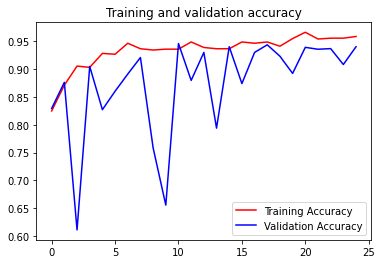

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving photo6109296984209863005 (1).jpg to photo6109296984209863005 (1) (2).jpg
[[4.8969817e-08 1.0000000e+00 5.6953220e-11]]
rock


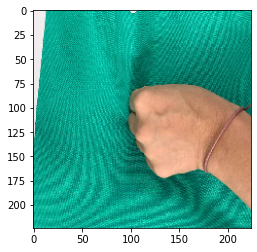

In [ ]:
import numpy as np      
from google.colab import files
from keras.preprocessing import image 

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(224, 224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = KerasModel.predict(images, batch_size=10)
  print(classes)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')

In [ ]:
np.argmax(classes, axis = 1)

array([1])

RICHARD JULIANO "TUGAS DICODING"